___

<a href='https://rt-ed.co.il/'> <img src='https://rt-ed.co.il/wp-content/uploads/2020/06/logo-svg.svg' width=193 height=130 /></a>
___


# Supervised Learning Capstone Project - Tree Methods Focus 




----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [17]:
# CODE HERE

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [19]:
# CODE HERE

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [21]:
# CODE HERE

<Axes: xlabel='Churn', ylabel='count'>

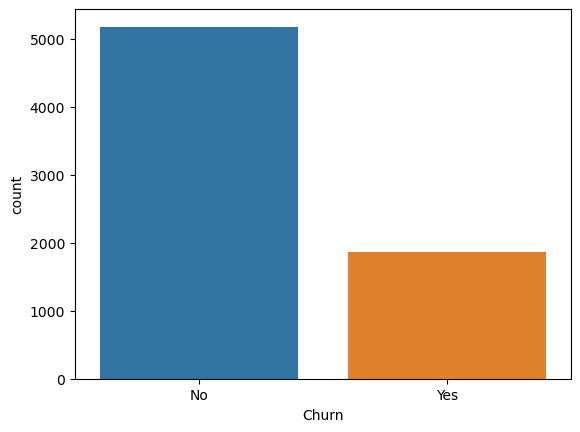

In [22]:
sns.countplot(data=df, x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

In [23]:
# CODE HERE

<Axes: xlabel='Churn', ylabel='TotalCharges'>

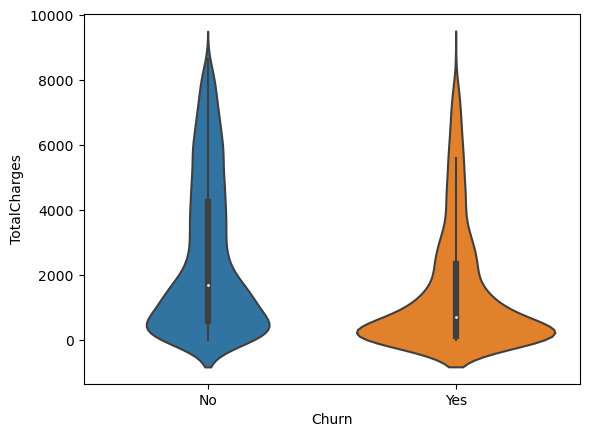

In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

average_total_charges = df['TotalCharges'].mean()

df['TotalCharges'].fillna(average_total_charges, inplace=True)

sns.violinplot(data=df, x='Churn', y='TotalCharges')

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [25]:
#CODE HERE

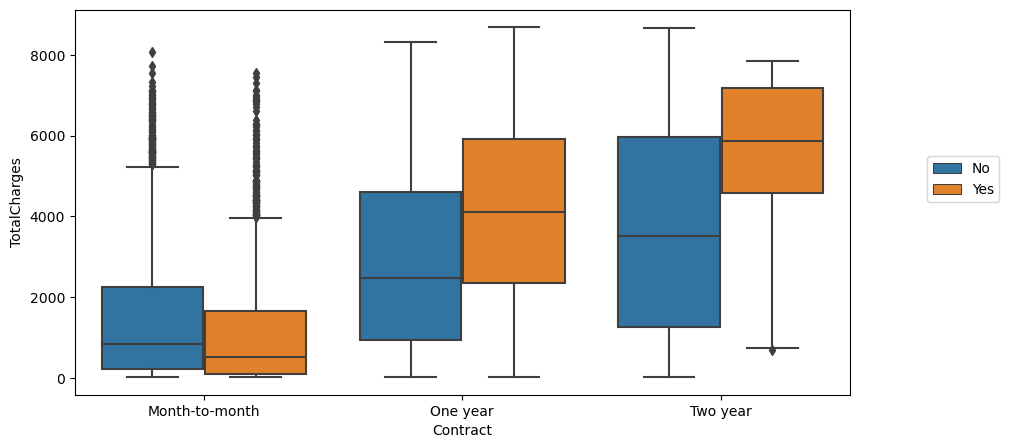

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1, 0.5))

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [16]:
#CODE HERE

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [30]:
corr_churn_yes = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
corr_churn_yes

Contract_Two year                         -0.302253
StreamingMovies_No internet service       -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
InternetService_No                        -0.227890
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtec

Text(0.5, 1.0, 'Yes Churn Correlation Features')

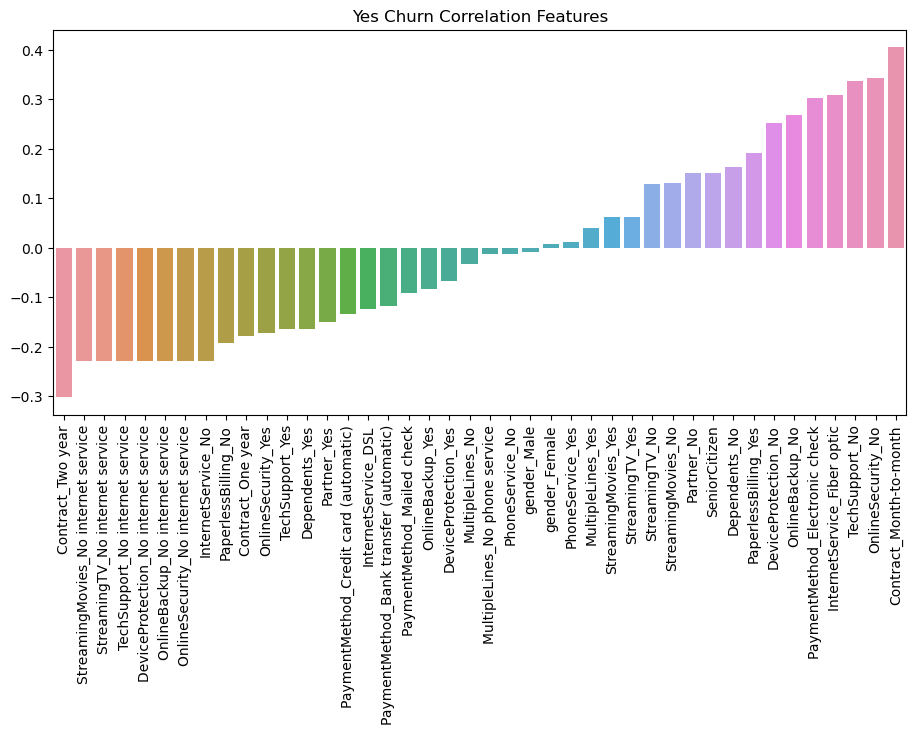

In [29]:
plt.figure(figsize=(11, 5))
sns.barplot(x = corr_churn_yes.index, y = corr_churn_yes.values)
plt.xticks(rotation=90)
plt.title('Yes Churn Correlation Features')

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [21]:
# CODE HERE

In [22]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [23]:
#CODE HERE

<Axes: xlabel='tenure', ylabel='Count'>

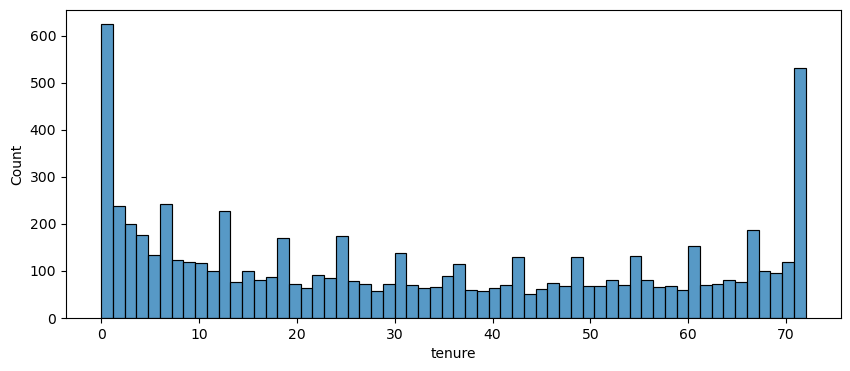

In [31]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='tenure', bins=60)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [32]:
#CODE HERE

<Figure size 1000x500 with 0 Axes>

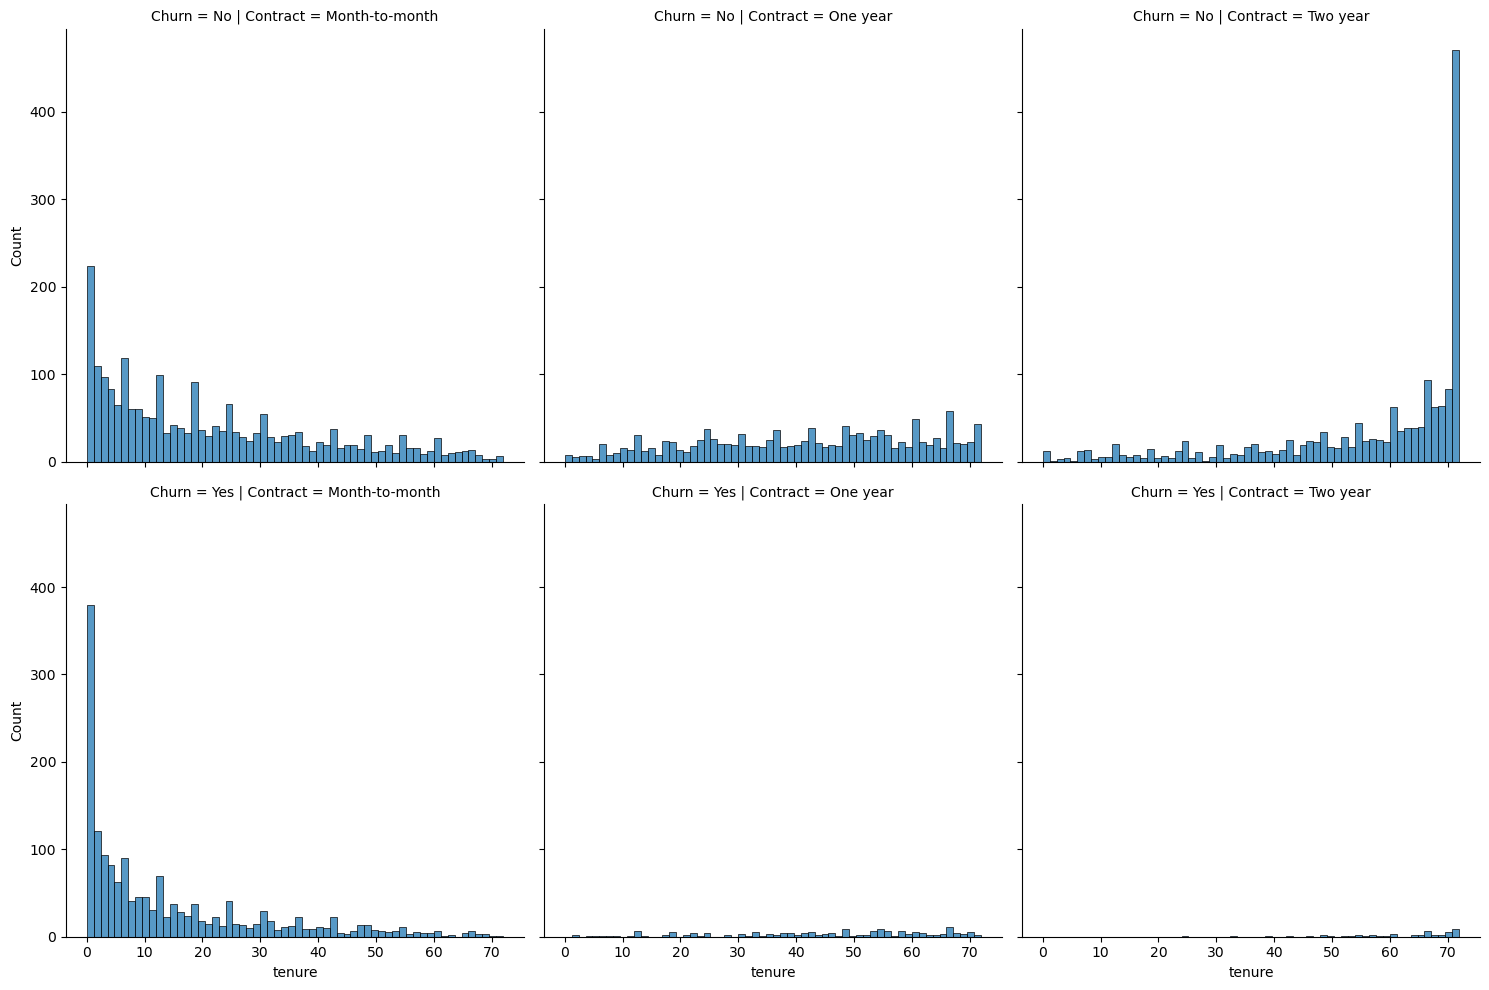

In [33]:
plt.figure(figsize=(10, 5))
sns.displot(data=df, x='tenure', row='Churn', col='Contract', bins=60)

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [34]:
#CODE HERE

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

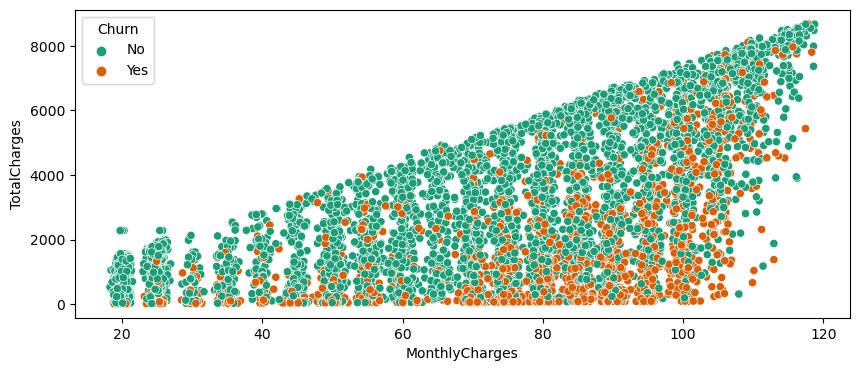

In [36]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Dark2')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [37]:
#CODE HERE

In [38]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [39]:
no_churn

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
customerID,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
gender,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
Partner,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
Dependents,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
PhoneService,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
InternetService,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356


In [40]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [41]:

churn_rates_by_tenure = churn_rate.transpose()['customerID'].dropna()

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [42]:
#CODE HERE

Text(0, 0.5, 'Churn Percentage')

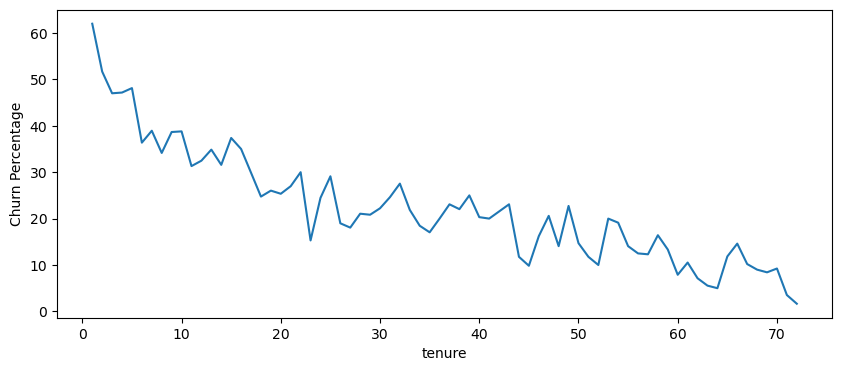

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 73), churn_rates_by_tenure)
plt.xlabel('tenure')
plt.ylabel('Churn Percentage')

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [44]:
# CODE HERE

In [45]:
# Define the bins and labels for tenure cohorts
bins = [0, 12, 24, 48, 72]
labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']

In [46]:
df['Tenure Cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [47]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [48]:
#CODE HERE

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

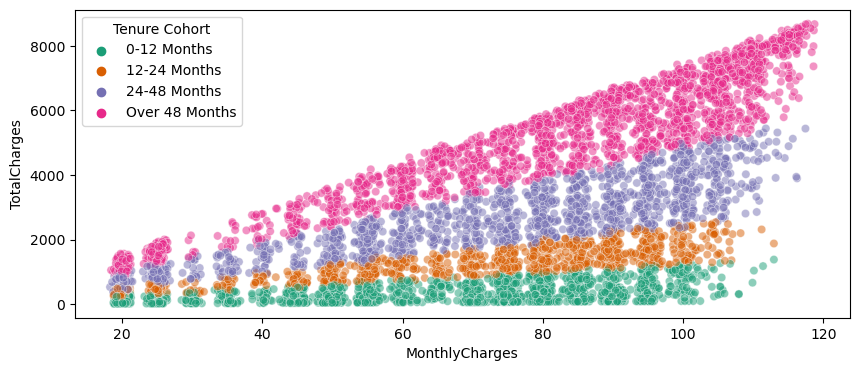

In [49]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', palette='Dark2', alpha=0.5)

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [50]:
# CODE HERE

<Axes: xlabel='Tenure Cohort', ylabel='count'>

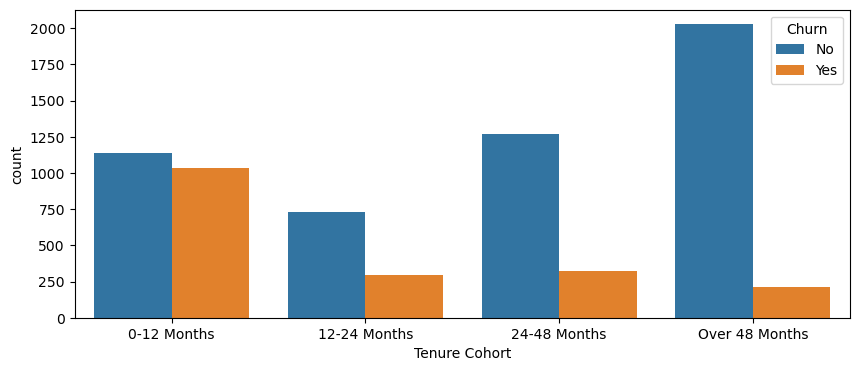

In [51]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [52]:
#CODE HERE

<Figure size 1000x400 with 0 Axes>

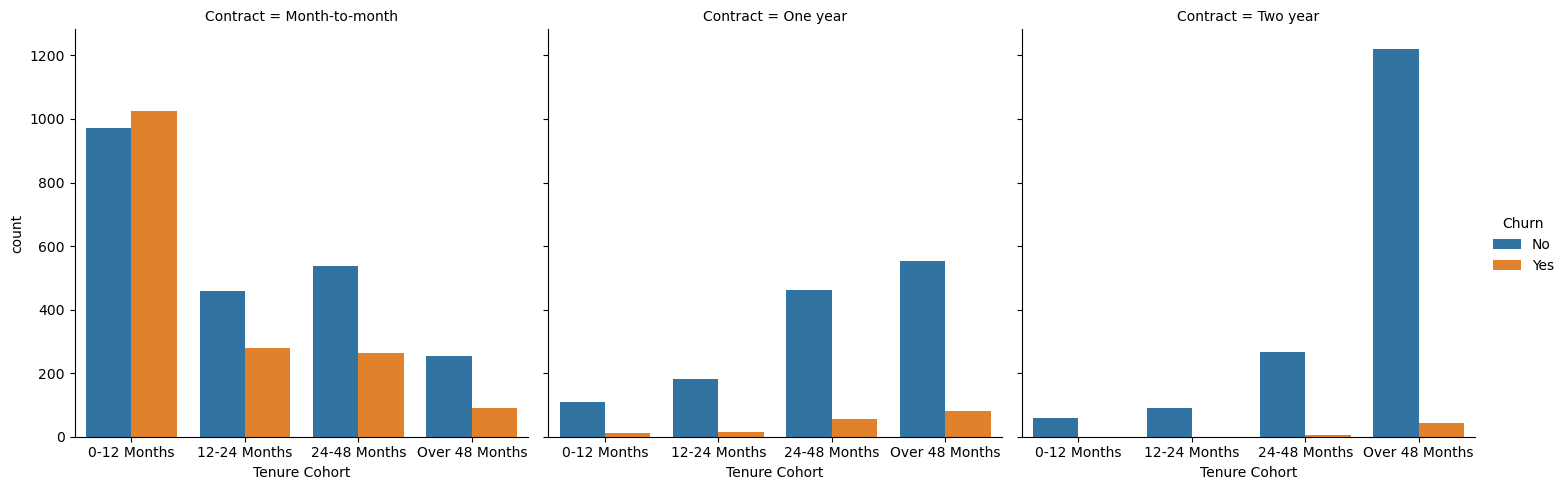

In [53]:
plt.figure(figsize=(10, 4))
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [54]:
#CODE HERE

In [55]:
X = df.drop(['customerID', 'Churn'], axis=1)
X = pd.get_dummies(data=X, drop_first=True)

In [56]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [57]:
#CODE HERE

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [61]:
paramaters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,50,1),
    'max_features': ['sqrt', 'log2'],   
}

dt_model = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5)
dt_model = dt_model.fit(X_train, y_train)
dt_model.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [62]:
dt_predictions = dt_model.predict(X_test)

In [63]:
print(classification_report(y_true=y_test, y_pred=dt_predictions))

              precision    recall  f1-score   support

          No       0.81      0.90      0.86       505
         Yes       0.66      0.47      0.55       200

    accuracy                           0.78       705
   macro avg       0.74      0.69      0.70       705
weighted avg       0.77      0.78      0.77       705



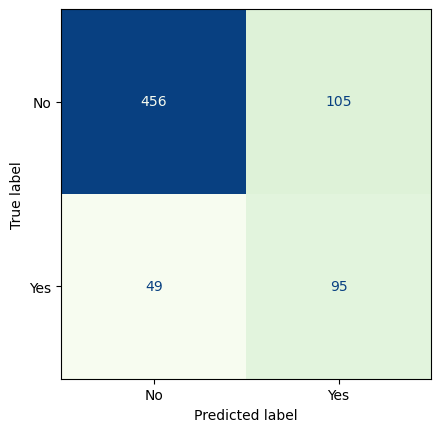

In [64]:
cm = confusion_matrix(dt_predictions, y_test)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
display.plot(cmap="GnBu", colorbar=False)
plt.grid(False)

In [65]:
best_model = dt_model.best_estimator_  # Access the best estimator from GridSearchCV
feature_importances = pd.DataFrame(index=X.columns, data=best_model.feature_importances_, columns=['importance']).sort_values('importance')
feature_importances

,importance
DeviceProtection_No internet service,0.000000
PaymentMethod_Credit card (automatic),0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
MultipleLines_Yes,0.000000
OnlineSecurity_No internet service,0.000000
DeviceProtection_Yes,0.000000
OnlineBackup_No internet service,0.000000
InternetService_No,0.000031
MultipleLines_No phone service,0.000053


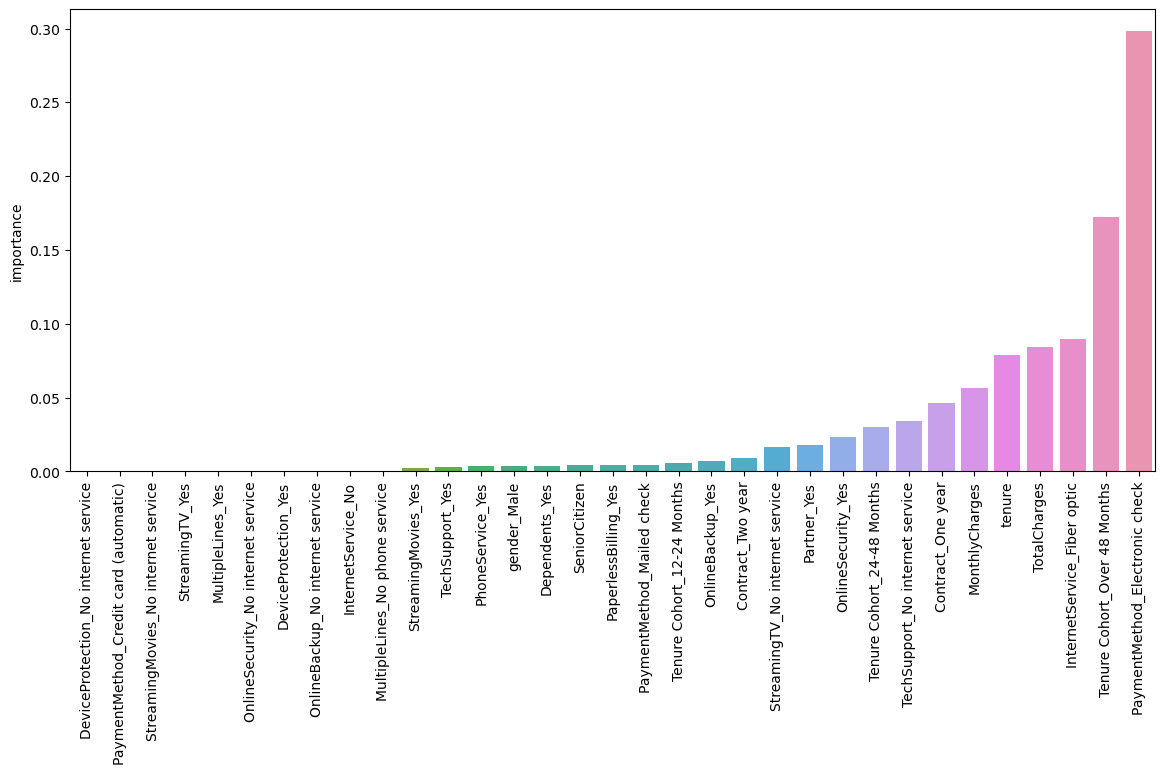

In [66]:
plt.figure(figsize=(14, 6))
sns.barplot(data=feature_importances, x=feature_importances.index, y='importance')
plt.xticks(rotation=90)
plt.show()

In [67]:
from sklearn.tree import plot_tree

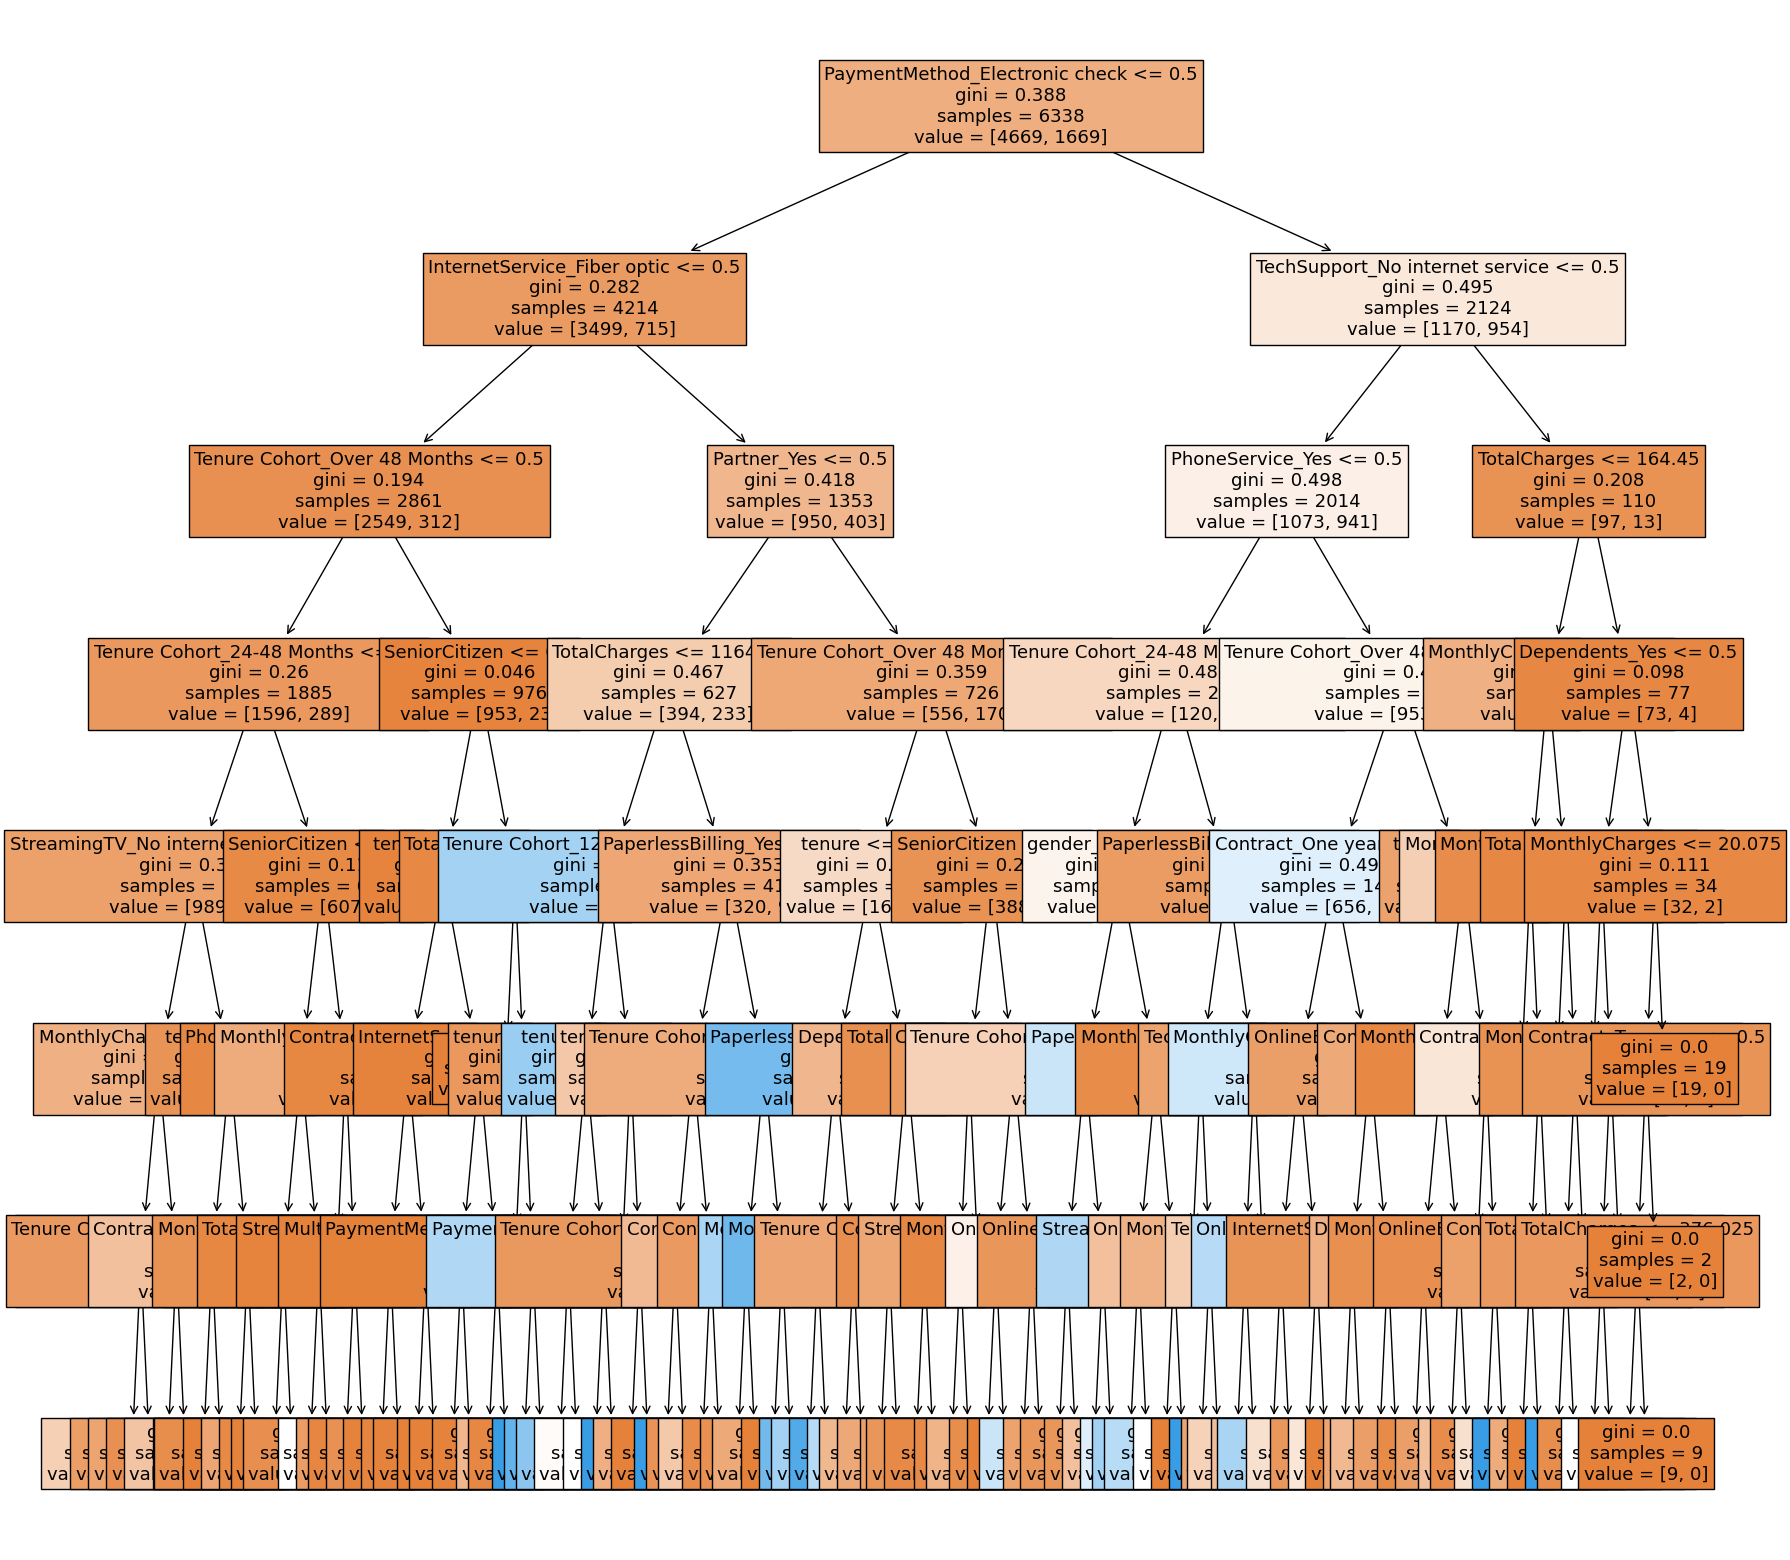

In [68]:
plt.figure(figsize=(20, 20))
plot_tree(dt_model.best_estimator_, filled=True, feature_names=X.columns.tolist(), fontsize=13)
plt.show()

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [69]:
#CODE HERE

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
parameters = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'max_features': ['sqrt', 'log2'],
}
rf_model = GridSearchCV(RandomForestClassifier(), parameters, cv=5, verbose=3, n_jobs=-1)

In [72]:
rf_model = rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [73]:
rf_model.best_params_

{'max_features': 'sqrt', 'n_estimators': 512}

In [74]:
rf_predictions = rf_model.predict(X_test)

In [75]:
print(classification_report(y_true=y_test, y_pred=rf_predictions))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85       505
         Yes       0.63      0.46      0.53       200

    accuracy                           0.77       705
   macro avg       0.72      0.68      0.69       705
weighted avg       0.76      0.77      0.76       705



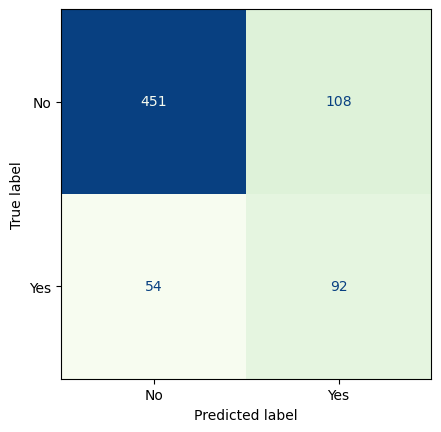

In [76]:
cm = confusion_matrix(rf_predictions, y_test)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
display.plot(cmap="GnBu", colorbar=False)
plt.grid(False)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [77]:
#CODE HERE

### Ada Boost

In [78]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [79]:
parameters = {
    'n_estimators': np.arange(30, 300, 20)
}

In [80]:
ada_model = GridSearchCV(AdaBoostClassifier(), parameters, cv=5)

In [81]:
ada_model = ada_model.fit(X_train, y_train)

In [82]:
ada_model.best_params_

{'n_estimators': 110}

In [83]:
ada_predictions = ada_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=ada_predictions))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85       505
         Yes       0.64      0.48      0.55       200

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.76      0.78      0.77       705



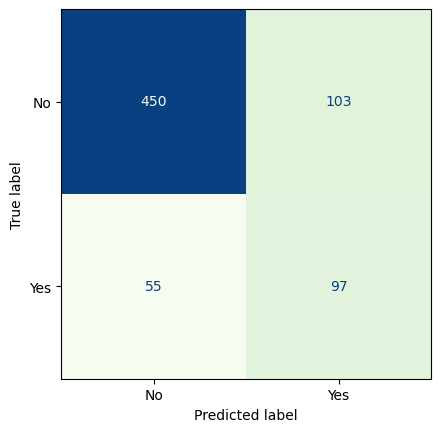

In [84]:
cm = confusion_matrix(ada_predictions, y_test)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)
display.plot(cmap="GnBu", colorbar=False)
plt.grid(False)

### Gradient Boost

In [85]:
gb_model = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)

In [86]:
gb_model = gb_model.fit(X_train, y_train)

In [87]:
gb_model.best_params_

{'n_estimators': 90}

In [88]:
gb_predictions = gb_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=gb_predictions))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86       505
         Yes       0.68      0.49      0.57       200

    accuracy                           0.79       705
   macro avg       0.75      0.70      0.72       705
weighted avg       0.78      0.79      0.78       705



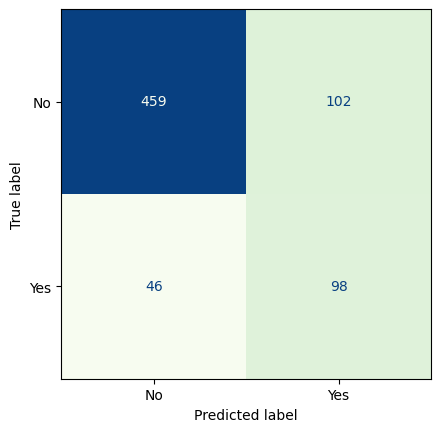

In [89]:
cm = confusion_matrix(gb_predictions, y_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
display.plot(cmap="GnBu", colorbar=False)
plt.grid(False)

**TASK: Analyze your results, which model performed best for you?**

In [102]:
# In alll four parts of the confusion matrix, and also in the accuracy, I got better results for Gardient Bossting,
# So I will prefer using it.
# The gap was not big, so I don't know if it is very significantץ

### Great job!